In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split #For spliting data into 2 sets of train and test

from sklearn.feature_selection import mutual_info_classif #For calculating information gain

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Farsi language processing lib
#!pip install hazm
from hazm import *

In [2]:
df_raw = pd.read_csv("products.csv")
df_raw.head()

,_key,url,name,price,مشخصات فیزیکی/ابعاد,مشخصات فیزیکی/وزن,پردازنده مرکزی/سازنده پردازنده,پردازنده مرکزی/سری پردازنده,پردازنده مرکزی/مدل پردازنده,پردازنده مرکزی/محدوده سرعت پردازنده,...,حافظه داخلی/مشخصات حافظه داخلی,پردازنده گرافیکی/سازنده پردازنده گرافیکی,پردازنده گرافیکی/مدل پردازنده گرافیکی,پردازنده گرافیکی/حافظه اختصاصی پردازنده گرافیکی,صفحه نمایش/اندازه صفحه نمایش,صفحه نمایش/نوع صفحه نمایش,صفحه نمایش/دقت صفحه نمایش,صفحه نمایش/صفحه نمایش مات,صفحه نمایش/صفحه نمایش لمسی,صفحه نمایش/توضیحات صفحه نمایش
0,807845,https://www.digikala.com/product/dkp-807845,Lenovo ThinkPad E590 - E 15.6 Inch laptop,"۱۵,۹۰۰,۰۰۰",19.9 × 242 × 329 میلی‌متر,2.1 کیلوگرم,Intel,Core i3,8145U,تا 2.0GHz,...,سرعت چرخش 5400 دور بر دقیقه,Intel,UHD Graphics 620,بدون حافظه‌ی گرافیکی مجزا,15.6 اینچ,TFT LED-backlit LCD,HD|1366x768,بله,خیر,نسبت تصویر 16:9
1,1165258,https://www.digikala.com/product/dkp-1165258,Lenovo Ideapad 330 - BQ - 15 inch Laptop,"۲۷,۵۰۰,۰۰۰",22.9 × 260 × 378 میلی‌متر,2.2 کیلوگرم,Intel,Core i7,8550U,تا 2.0GHz,...,5400RPM,NVIDIA,GeForce MX150 GDDR5,4GB,15.6 اینچ,TFT LED-backlit LCD,Full HD| 1920 x1080,بله,خیر,نسبت تصویر 16.9
2,1722266,https://www.digikala.com/product/dkp-1722266,Apple MacBook Pro MV962 2019 - 13 inch Laptop ...,"۴۹,۹۹۹,۰۰۰",14.9 × 212.4 × 304.1 میلی‌متر,1.37 کیلوگرم,Intel,Core i5,Intel Core i5 quad-core Coffee Lake (8279U),2.2 تا 2.5 گیگاهرتز,...,PCIe-based onboard,Intel,Intel Iris Plus Graphics 640,بدون حافظه‌ی گرافیکی مجزا,13.3 اینچ,IPS LED-backlit LCD,QHD|2560x1600,خیر,خیر,نسبت تصویر 16:9 و 227 پیکسل در هر اینچ
3,1722812,https://www.digikala.com/product/dkp-1722812,Apple MacBook Pro MV972 2019 - 13 inch Laptop ...,"۵۴,۹۹۹,۰۰۰",14.9 × 212.4 × 304.1 میلی‌متر,1.37 کیلوگرم,Intel,Core i5,Intel Core i5 quad-core Coffee Lake (8279U),2.2 تا 2.5 گیگاهرتز,...,PCIe-based onboard,Intel,Intel Iris Plus Graphics 640,بدون حافظه‌ی گرافیکی مجزا,13.3 اینچ,IPS LED-backlit LCD,QHD|2560x1600,خیر,خیر,نسبت تصویر 16:9 و 227 پیکسل در هر اینچ
4,1743571,https://www.digikala.com/product/dkp-1743571,Lenovo ThinkPad E590 - A 15.6 Inch laptop,"۲۳,۲۹۹,۰۰۰",329.3x242x19.9 میلی‌متر,2.1 کیلوگرم,Intel,Core i5,8265U,2.8 گیگاهرتز و بیشتر,...,5400RPM,AMD,AMD Radeon RX550,2GB,15.6 اینچ,TFT LED-backlit LCD,HD|1366x768,بله,خیر,NaN


In [3]:
%run -i 'DatasetProcessor.py'

In [4]:
df = pd.read_csv("fixed.csv")

In [5]:
df.head()

,ProductID,Price,Weight,CPUCompany,CPUModel,CPUSpeed,CPUCacheSize,RAMCapacity,RAMTechnology,DisplaySize,DisplayPixelWidth,DisplayPixelHeight
0,807845,15900000,2.10,Intel,Core i3,2.0,4.0,4,DDR4,15.6,1366,768
1,1165258,27500000,2.20,Intel,Core i7,2.0,8.0,16,DDR4,15.6,1920,1080
2,1722266,49999000,1.37,Intel,Core i5,2.2,6.0,8,DDR4,13.3,2560,1600
3,1722812,54999000,1.37,Intel,Core i5,2.2,6.0,8,DDR4,13.3,2560,1600
4,1743571,23299000,2.10,Intel,Core i5,2.8,6.0,8,DDR4,15.6,1366,768


In [6]:
X_encoded = pd.get_dummies(df, columns=['CPUModel', 'CPUCompany','RAMTechnology'], drop_first=True)
X_encoded

,ProductID,Price,Weight,CPUSpeed,CPUCacheSize,RAMCapacity,DisplaySize,DisplayPixelWidth,DisplayPixelHeight,CPUModel_Bristol Ridge,...,CPUModel_Core i3,CPUModel_Core i5,CPUModel_Core i7,CPUModel_Pentium,CPUModel_Ryzen 3,CPUModel_Ryzen 5,CPUModel_Ryzen 7,CPUModel_Xeon,CPUCompany_Intel,RAMTechnology_DDR4
0,807845,15900000,2.10,2.0,4.0,4,15.6,1366,768,0,...,1,0,0,0,0,0,0,0,1,1
1,1165258,27500000,2.20,2.0,8.0,16,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
2,1722266,49999000,1.37,2.2,6.0,8,13.3,2560,1600,0,...,0,1,0,0,0,0,0,0,1,1
3,1722812,54999000,1.37,2.2,6.0,8,13.3,2560,1600,0,...,0,1,0,0,0,0,0,0,1,1
4,1743571,23299000,2.10,2.8,6.0,8,15.6,1366,768,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3629341,28410000,1.90,NaN,8.0,8,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
226,3634340,31800000,1.90,2.8,8.0,8,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
227,3634341,32800000,1.90,2.8,8.0,12,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
228,3634646,48600000,1.15,2.0,8.0,16,14.0,1920,1080,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X_encoded = X_encoded.dropna() 
X_encoded

,ProductID,Price,Weight,CPUSpeed,CPUCacheSize,RAMCapacity,DisplaySize,DisplayPixelWidth,DisplayPixelHeight,CPUModel_Bristol Ridge,...,CPUModel_Core i3,CPUModel_Core i5,CPUModel_Core i7,CPUModel_Pentium,CPUModel_Ryzen 3,CPUModel_Ryzen 5,CPUModel_Ryzen 7,CPUModel_Xeon,CPUCompany_Intel,RAMTechnology_DDR4
0,807845,15900000,2.10,2.0,4.0,4,15.6,1366,768,0,...,1,0,0,0,0,0,0,0,1,1
1,1165258,27500000,2.20,2.0,8.0,16,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
2,1722266,49999000,1.37,2.2,6.0,8,13.3,2560,1600,0,...,0,1,0,0,0,0,0,0,1,1
3,1722812,54999000,1.37,2.2,6.0,8,13.3,2560,1600,0,...,0,1,0,0,0,0,0,0,1,1
4,1743571,23299000,2.10,2.8,6.0,8,15.6,1366,768,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,3611239,25200000,2.04,2.0,6.0,8,15.6,1366,768,0,...,0,1,0,0,0,0,0,0,1,1
226,3634340,31800000,1.90,2.8,8.0,8,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
227,3634341,32800000,1.90,2.8,8.0,12,15.6,1920,1080,0,...,0,0,1,0,0,0,0,0,1,1
228,3634646,48600000,1.15,2.0,8.0,16,14.0,1920,1080,0,...,0,0,1,0,0,0,0,0,1,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Gain')

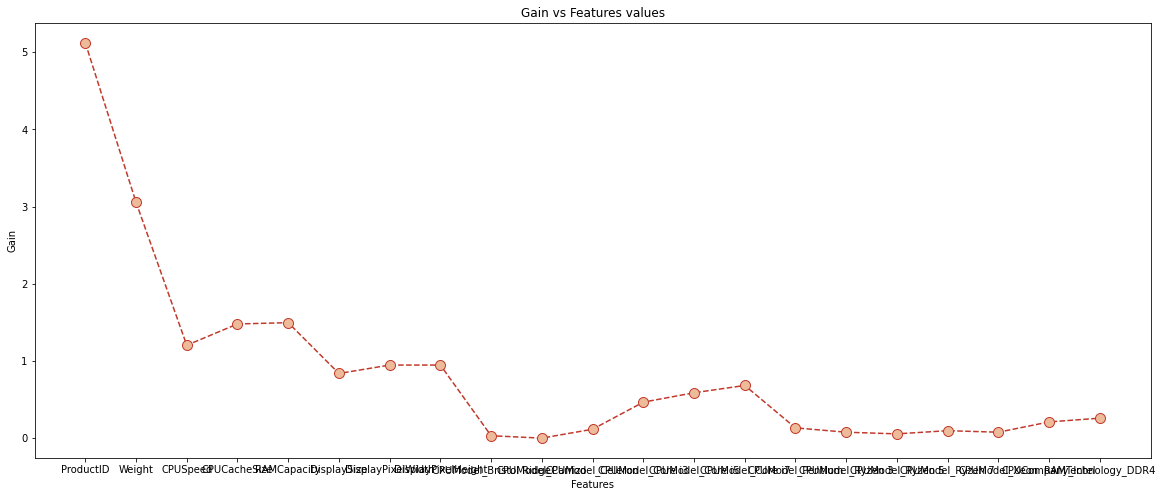

In [8]:
y = X_encoded['Price']
X_mic = X_encoded.drop(columns=['Price'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic 
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Gain')

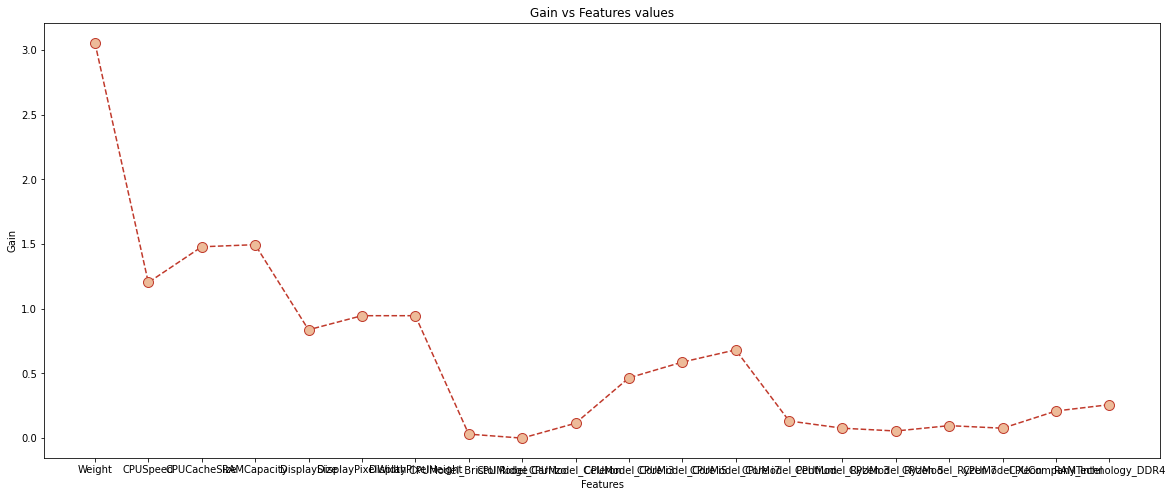

In [9]:
X_mic = X_mic.drop(columns=['ProductID'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic 
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

In [10]:
#seprating dataset for train and test
X_train , X_test ,y_train , y_test = train_test_split(X_mic,y, test_size=0.2, train_size=0.8, shuffle=True)

In [11]:
# preproccessing and normalization then fitting a model
# X_trainp = X_train.reshape(-1,1)
y_trainp = y_train.ravel()
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_trainp)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [12]:
coeffs = pd.DataFrame(reg.named_steps['sgdregressor'].coef_,X_mic.columns,columns=['Coefficient'])
coeffs

,Coefficient
Weight,1.049077e+06
CPUSpeed,-4.697313e+05
CPUCacheSize,1.351621e+07
RAMCapacity,7.017513e+06
DisplaySize,-2.796636e+06
DisplayPixelWidth,-4.958168e+06
DisplayPixelHeight,1.056060e+07
CPUModel_Bristol Ridge,1.104479e+06
CPUModel_Carrizo,0.000000e+00
CPUModel_Celeron,-6.481151e+05


In [13]:
# testing model
# X_testp = X_test.reshape(-1,1)
yhat = reg.predict(X_test)

In [14]:
# checking accuracy of model
reg.score(X_test,y_test)

0.8124081367098575

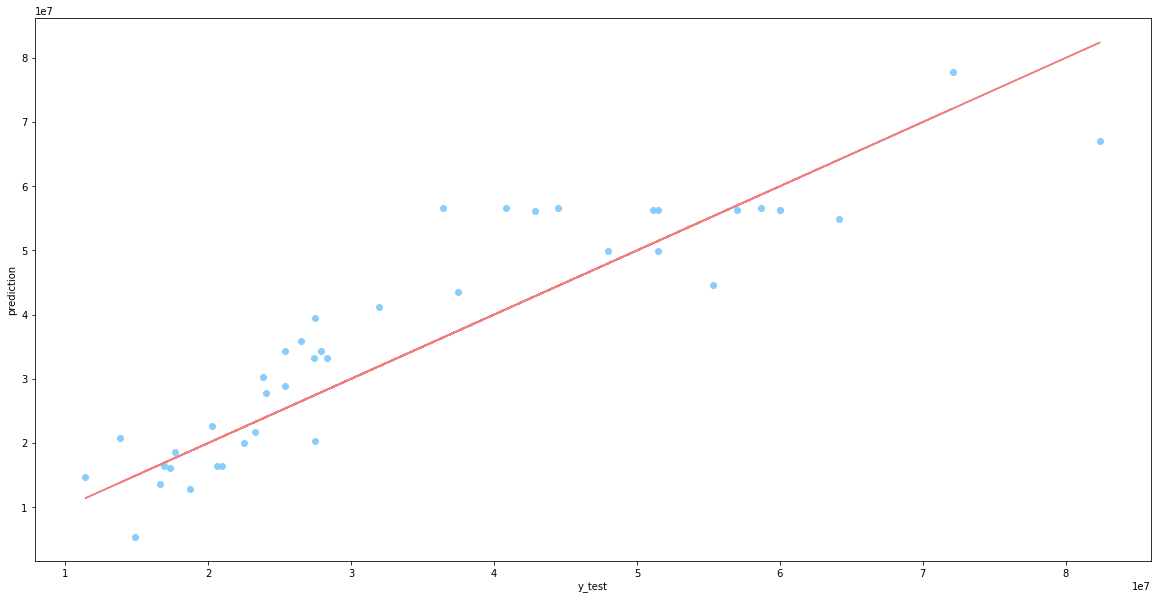

In [15]:
# ploting dataset and linear model together
plt.figure(figsize=(20,10))
plt.scatter(y_test,yhat, c = 'lightskyblue')
plt.ylabel("prediction")
plt.xlabel("y_test")
plt.plot(y_test,y_test, color='lightcoral')



In [16]:
#sample function for predictig price from given engine size
org_fields =['Weight','DisplaySize','DisplayPixelWidth','DisplayPixelHeight','CPUSpeed','CPUCacheSize','RAMCapacity']
def sample(data):
    temp = {}
    for col in X_mic.columns:
        temp.update({str(col):[0]})
        
    for k in temp.keys():
        if(k in org_fields):
            temp[k][0] = data[k]
        else:
            for i in ['CPUModel', 'CPUCompany','RAMTechnology']:
                if(data[i] in str(k)):
                    temp[k][0]=1
    
            
    x =pd.DataFrame(temp)
    price = reg.predict(x) 
    return price[0]

In [17]:
data={'Weight':2.0,
      'DisplaySize':16.0,
      'DisplayPixelWidth':1920,
      'DisplayPixelHeight':1080,
      'CPUCompany':'Intel',
      'CPUModel':'Core i9',
      'CPUSpeed':3.0,
      'CPUCacheSize':16.0,
      'RAMCapacity':32,
      'RAMTechnology':'DDR4'
     }
sample(data)

87483417.88016146

In [18]:
#fairness function which indicates if the price is higher or lower than what it should be
def fairness(data,price,epsilon):
    pricehat = sample(data)
    if(abs(price - pricehat) <= epsilon*pricehat):
        print("fair")
    else:
        if(price > pricehat):
            print('more expensive')
        else:
            print('cheaper')

In [19]:
fairness(data,91522065,0.05)

fair
